# Installation of packages

In [2]:
! pip install -U scikit-learn

In [3]:
! pip install gplearn

In [4]:
!python ../setup.py install

python: can't open file '/home/jovyan/equation_discovery/../setup.py': [Errno 2] No such file or directory


In [5]:
import gplearn

In [6]:
import os
import shutil
import copy
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

# Variable importing

In [7]:
dqdz = np.load('./variables/dqdz.npy')
wq = np.load('./variables/wq.npy')
dqdz_stand = np.load('./variables/dqdz_stand.npy')
wq_stand = np.load('./variables/wq_stand.npy')

In [153]:
x = np.random.random(100) * 2 * np.pi - np.pi
xtest = np.random.random(100) * 2 * np.pi - np.pi
y = np.sin(2*x)

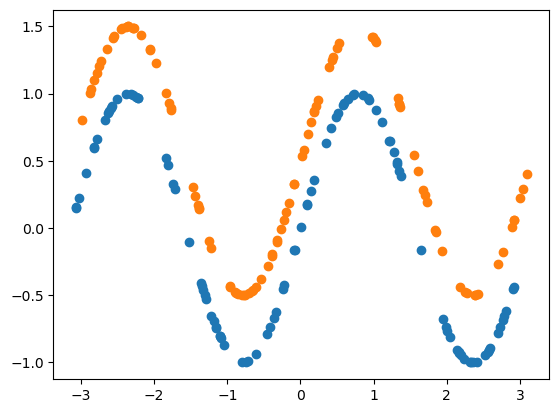

In [157]:
plt.scatter(x,y)
plt.scatter(xtest,np.sin(2*xtest)+.5)

In [82]:
model = SymbolicRegressor(function_set = ('add','sub','mul','div','sqrt','log','neg','sin'),
                          generations=20, tournament_size=20, random_state=42,verbose = 1)
model.fit(x.reshape(-1,1), y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.11          5.07142        8         0.477363              N/A     11.81s
   1     9.53          1.39327        4                0              N/A     10.75s


SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'neg', 'sin'),
                  random_state=42, verbose=1)

In [83]:
y_predict = model.predict(xtest.reshape(-1,1))

In [84]:
score = est_gp.score(xtest.reshape(-1,1), y_predict)

In [85]:
score

-32.41690803810684

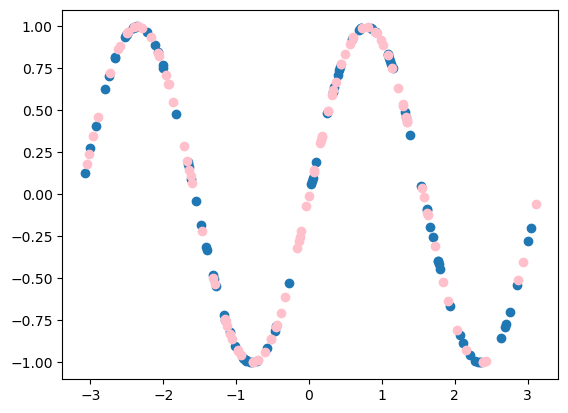

In [86]:
plt.scatter(x,y, label = "Truth")
plt.scatter(xtest,y_predict, color = "pink", label = "prediction")

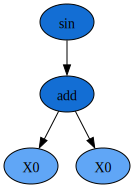

In [87]:
dot_data = model._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [148]:
x = np.random.random(100) * 2 * np.pi - np.pi
xtest = np.random.random(100) * 2 * np.pi - np.pi
y = 100*x + np.cos(x)
ytest = xtest**(2) + 2*x

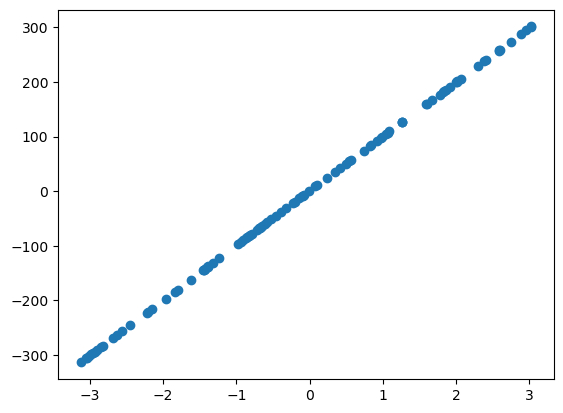

In [149]:
#plt.scatter(x,y)
plt.scatter(x,y)

In [135]:
model = SymbolicRegressor(function_set = ('add','sub','mul','div','sqrt','log','neg','sin'),
                          generations=20, tournament_size=20, random_state=42,verbose = 1)
model.fit(xtest.reshape(-1,1), ytest)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.11          8.31766        6          3.11458              N/A     11.58s
   1    14.61          4.61221        6          3.10858              N/A     11.09s
   2    13.34          5.17983       20          3.08155              N/A      9.93s
   3     6.39          4.82249       12           3.0675              N/A      8.35s
   4     8.21          4.51604       15          3.05121              N/A      8.21s
   5    12.92          4.19016       24          3.01832              N/A      8.15s
   6    16.18          3.67847       30          2.99547              N/A      7.79s
   7    22.93          3.44498       43          2.97229              N/A      7.52s
   8    29.57          3.48089       53          2.94603              N/A  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'neg', 'sin'),
                  random_state=42, verbose=1)

In [136]:
y_predict = model.predict(xtest.reshape(-1,1))

In [137]:
score = est_gp.score(xtest.reshape(-1,1), y_predict)
score

-2.553984884101485

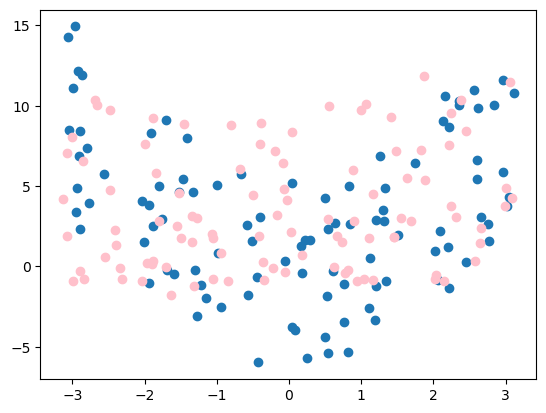

In [138]:
plt.scatter(xtest,ytest, label = "Truth")
plt.scatter(x,y_predict, color = "pink", label = "prediction")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


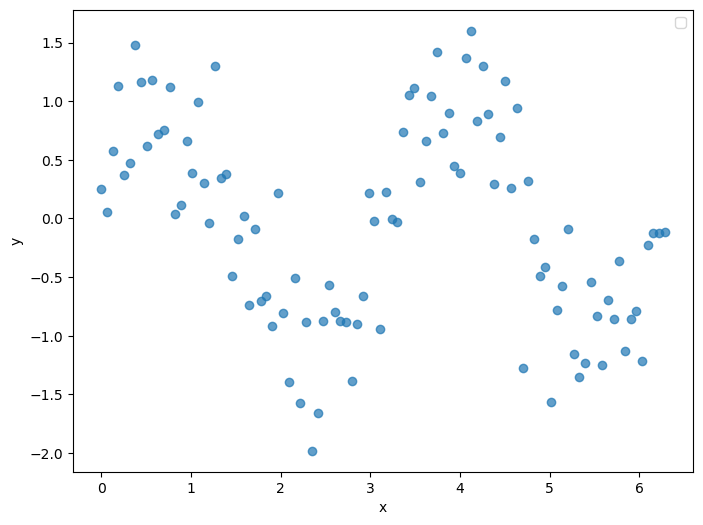

In [165]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate data points for the x-axis (sine curve input)
x = np.linspace(0, 2*np.pi, 100)  # 100 data points between 0 and 2*pi

# Generate the corresponding sine curve values (y-axis)
y_true = np.sin(2*x)

# Add some random noise to the y values
noise = 0.5 * np.random.normal(size=len(y_true))  # Adjust the scaling factor for desired noise level
y_noisy = y_true + noise

# Plot the original sine curve and the noisy data
plt.figure(figsize=(8, 6))
#plt.plot(x, y_true, label='True Sine Curve', color='blue', linewidth=2)
plt.scatter(x, y_noisy, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


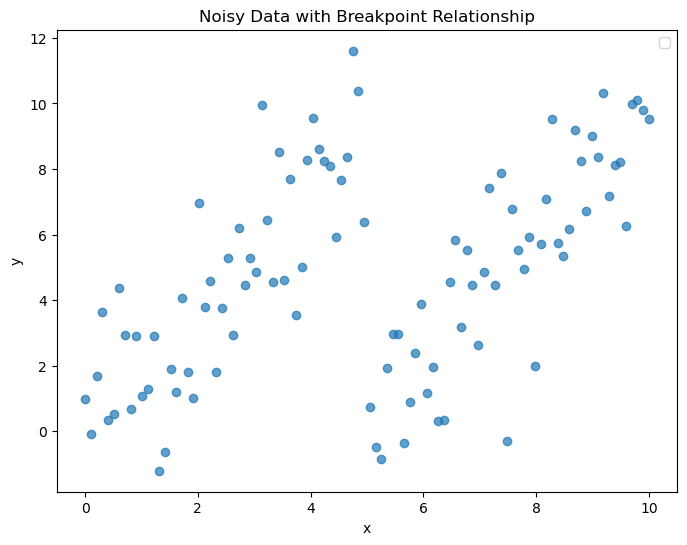

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data points for the x-axis
x = np.linspace(0, 10, 100)

# Generate the corresponding y-axis values with a breakpoint at x=5
y_true = np.piecewise(x, [x < 5, x >= 5], [lambda x: 2*x, lambda x: 2*x - 10])

# Add some random noise to the y values
noise = np.random.normal(loc=0, scale=2, size=len(y_true))  # Adjust the scale for desired noise level
y_noisy = y_true + noise

# Plot the original data and the noisy data
plt.figure(figsize=(8, 6))
#plt.plot(x, y_true, label='True Relationship', linewidth=2)
plt.scatter(x, y_noisy, alpha=0.7)
#plt.axvline(x=5, color='green', linestyle='--', label='Breakpoint at x=5')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data with Breakpoint Relationship')
plt.legend()
#plt.grid(True)
plt.show()

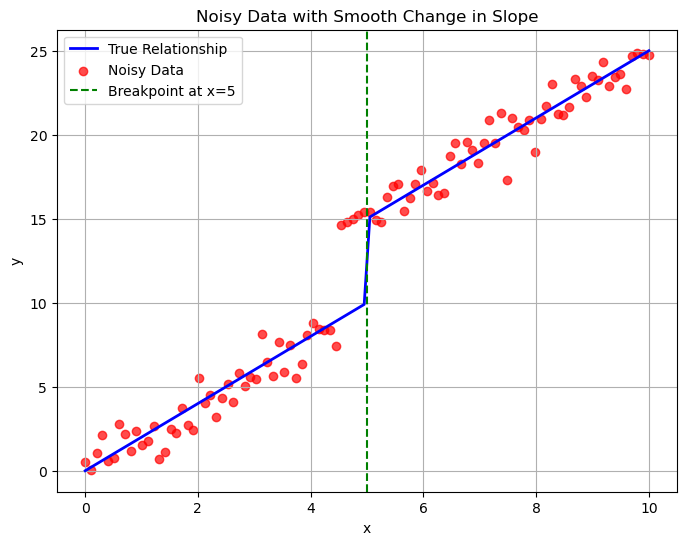

In [5]:
np.random.seed(42)

# Generate data points for the x-axis
x = np.linspace(0, 10, 100)

# Generate the corresponding y-axis values with a breakpoint at x=5
y_true = np.piecewise(x, [x < 5, x >= 5], [lambda x: 2*x, lambda x: 2*x + 5])

# Add some random noise to the y values
noise = np.random.normal(loc=0, scale=1, size=len(y_true))  # Adjust the scale for desired noise level
y_noisy = y_true + noise

# Smoothly connect the two segments with a polynomial transition
transition_length = 5
transition_x = np.linspace(4.8, 5.2, transition_length)
transition_y = 2 * transition_x + 5
y_noisy[45:50] = transition_y[:5]

# Plot the original data and the noisy data
plt.figure(figsize=(8, 6))
plt.plot(x, y_true, label='True Relationship', color='blue', linewidth=2)
plt.scatter(x, y_noisy, label='Noisy Data', color='red', alpha=0.7)
plt.axvline(x=5, color='green', linestyle='--', label='Breakpoint at x=5')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data with Smooth Change in Slope')
plt.legend()
plt.grid(True)
plt.show()
